In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [4]:
df.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [5]:
df

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782
...,...,...,...,...,...,...,...,...
32160,183202,Cymbalta,Anxiety,"""I have been taking Cymbalta for 15 months now...",9,10-Jun-13,89,6.963020
32161,109111,Nexplanon,Birth Control,"""I have had the Nexplanon since Dec. 27, 2016 ...",6,6-Apr-17,0,0.899076
32162,121154,Venlafaxine,Panic Disorde,"""Had panic attacks and social anxiety starting...",9,10-Nov-16,25,6.241812
32163,45410,Fluoxetine,Obsessive Compulsive Disorde,"""I have been off Prozac for about 4 weeks now....",8,21-Jan-15,22,7.940428


In [6]:
fin_df = pd.get_dummies(df, columns=['name_of_drug', 'use_case_for_drug'])

In [7]:
fin_df.head()

,patient_id,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,name_of_drug_Abacavir / dolutegravir / lamivudine,name_of_drug_Abatacept,name_of_drug_Abilify,name_of_drug_Abilify Discmelt,...,use_case_for_drug_min / pioglitazone),use_case_for_drug_min / rosiglitazone),use_case_for_drug_min / saxagliptin),use_case_for_drug_min / sitagliptin),use_case_for_drug_min),use_case_for_drug_moterol / mometasone),use_case_for_drug_moterol),use_case_for_drug_mulation) (phenylephrine),use_case_for_drug_von Willebrand's Disease,use_case_for_drug_zen Shoulde
0,206461,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,95260,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,92703,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35696,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,155963,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test.head()

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2


In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [10]:
la = LabelEncoder()
la2 = LabelEncoder()

In [11]:
total = df.append(test)
total.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [12]:
total.tail()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
10755,151266,Chantix,Smoking Cessation,"""I took chantix a little over a month. It made...",1,11-Nov-17,2,NaN
10756,139347,Armodafinil,Narcolepsy,"""This medicine kept me from sleeping the whole...",1,30-Sep-14,18,NaN
10757,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43,NaN
10758,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7,NaN
10759,113712,Arthrotec,Sciatica,"""It works!!!""",9,13-Sep-09,46,NaN


In [13]:
total['enc_ucd'] = la.fit_transform(total['use_case_for_drug'])

In [14]:
total['enc_nod'] = la2.fit_transform(total['name_of_drug'])

In [15]:
total.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,enc_ucd,enc_nod
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969,351,2222
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458,42,980
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969,114,1285
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176,432,352
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782,109,461


In [16]:
train = total[~total['base_score'].isna()].reset_index(drop=True)
test = total[total['base_score'].isna()].reset_index(drop=True)

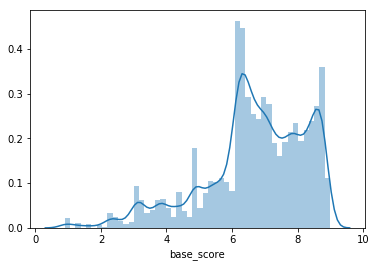

In [23]:
sns.distplot((train['base_score']))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(train[['enc_nod', 'enc_ucd', 
                                                           'effectiveness_rating',
                                                           'number_of_times_prescribed']], train['base_score'], test_size=0.33, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestRegressor
import catboost
import lightgbm
import xgboost
import numpy as np

In [21]:
rf = RandomForestRegressor()
cat = catboost.CatBoostRegressor()
lgt = lightgbm.LGBMRegressor()

In [25]:
std = StandardScaler()

In [24]:
X = np.array(X_train)

In [27]:
X_std = std.fit_transform(X)

In [28]:
rf.fit(X_std, y_train)
cat.fit(X_std, y_train)
lgt.fit(X_std, y_train)

Learning rate set to 0.067415
0:	learn: 1.5342286	total: 213ms	remaining: 3m 33s
1:	learn: 1.4882034	total: 222ms	remaining: 1m 50s
2:	learn: 1.4415214	total: 232ms	remaining: 1m 17s
3:	learn: 1.4030594	total: 241ms	remaining: 60s
4:	learn: 1.3632376	total: 249ms	remaining: 49.5s
5:	learn: 1.3268999	total: 256ms	remaining: 42.5s
6:	learn: 1.2918879	total: 264ms	remaining: 37.4s
7:	learn: 1.2573266	total: 273ms	remaining: 33.8s
8:	learn: 1.2292561	total: 282ms	remaining: 31.1s
9:	learn: 1.2040361	total: 288ms	remaining: 28.5s
10:	learn: 1.1758053	total: 292ms	remaining: 26.2s
11:	learn: 1.1529553	total: 296ms	remaining: 24.4s
12:	learn: 1.1327003	total: 303ms	remaining: 23s
13:	learn: 1.1110639	total: 307ms	remaining: 21.6s
14:	learn: 1.0939904	total: 313ms	remaining: 20.6s
15:	learn: 1.0773496	total: 320ms	remaining: 19.7s
16:	learn: 1.0610984	total: 328ms	remaining: 18.9s
17:	learn: 1.0464867	total: 336ms	remaining: 18.3s
18:	learn: 1.0335474	total: 343ms	remaining: 17.7s
19:	learn: 1

170:	learn: 0.4300880	total: 1.38s	remaining: 6.69s
171:	learn: 0.4295008	total: 1.38s	remaining: 6.67s
172:	learn: 0.4281178	total: 1.39s	remaining: 6.64s
173:	learn: 0.4257534	total: 1.39s	remaining: 6.62s
174:	learn: 0.4229534	total: 1.4s	remaining: 6.59s
175:	learn: 0.4223400	total: 1.4s	remaining: 6.56s
176:	learn: 0.4207645	total: 1.41s	remaining: 6.54s
177:	learn: 0.4188357	total: 1.42s	remaining: 6.54s
178:	learn: 0.4177594	total: 1.42s	remaining: 6.53s
179:	learn: 0.4171373	total: 1.43s	remaining: 6.53s
180:	learn: 0.4150716	total: 1.44s	remaining: 6.51s
181:	learn: 0.4133305	total: 1.45s	remaining: 6.51s
182:	learn: 0.4129914	total: 1.46s	remaining: 6.5s
183:	learn: 0.4105377	total: 1.46s	remaining: 6.49s
184:	learn: 0.4103240	total: 1.47s	remaining: 6.48s
185:	learn: 0.4077892	total: 1.48s	remaining: 6.47s
186:	learn: 0.4064823	total: 1.49s	remaining: 6.46s
187:	learn: 0.4052534	total: 1.49s	remaining: 6.45s
188:	learn: 0.4029197	total: 1.5s	remaining: 6.45s
189:	learn: 0.40

334:	learn: 0.2740517	total: 2.57s	remaining: 5.1s
335:	learn: 0.2739025	total: 2.58s	remaining: 5.09s
336:	learn: 0.2734116	total: 2.58s	remaining: 5.07s
337:	learn: 0.2730089	total: 2.58s	remaining: 5.06s
338:	learn: 0.2722461	total: 2.59s	remaining: 5.04s
339:	learn: 0.2721227	total: 2.59s	remaining: 5.03s
340:	learn: 0.2711574	total: 2.6s	remaining: 5.02s
341:	learn: 0.2706013	total: 2.6s	remaining: 5.01s
342:	learn: 0.2697500	total: 2.61s	remaining: 5s
343:	learn: 0.2689522	total: 2.62s	remaining: 4.99s
344:	learn: 0.2683501	total: 2.62s	remaining: 4.98s
345:	learn: 0.2673131	total: 2.63s	remaining: 4.97s
346:	learn: 0.2667011	total: 2.64s	remaining: 4.96s
347:	learn: 0.2665401	total: 2.64s	remaining: 4.95s
348:	learn: 0.2656472	total: 2.65s	remaining: 4.95s
349:	learn: 0.2652484	total: 2.66s	remaining: 4.94s
350:	learn: 0.2645574	total: 2.67s	remaining: 4.93s
351:	learn: 0.2639399	total: 2.68s	remaining: 4.93s
352:	learn: 0.2635165	total: 2.68s	remaining: 4.92s
353:	learn: 0.2628

506:	learn: 0.1999287	total: 3.76s	remaining: 3.66s
507:	learn: 0.1995568	total: 3.76s	remaining: 3.65s
508:	learn: 0.1995410	total: 3.77s	remaining: 3.64s
509:	learn: 0.1995257	total: 3.78s	remaining: 3.63s
510:	learn: 0.1992113	total: 3.78s	remaining: 3.62s
511:	learn: 0.1987415	total: 3.79s	remaining: 3.61s
512:	learn: 0.1983918	total: 3.79s	remaining: 3.6s
513:	learn: 0.1981505	total: 3.8s	remaining: 3.59s
514:	learn: 0.1977646	total: 3.81s	remaining: 3.58s
515:	learn: 0.1975868	total: 3.81s	remaining: 3.58s
516:	learn: 0.1975720	total: 3.82s	remaining: 3.57s
517:	learn: 0.1975577	total: 3.83s	remaining: 3.56s
518:	learn: 0.1973752	total: 3.83s	remaining: 3.55s
519:	learn: 0.1972076	total: 3.84s	remaining: 3.55s
520:	learn: 0.1970117	total: 3.85s	remaining: 3.54s
521:	learn: 0.1964858	total: 3.86s	remaining: 3.53s
522:	learn: 0.1963258	total: 3.86s	remaining: 3.52s
523:	learn: 0.1962220	total: 3.87s	remaining: 3.52s
524:	learn: 0.1959104	total: 3.88s	remaining: 3.51s
525:	learn: 0.

675:	learn: 0.1585325	total: 4.92s	remaining: 2.36s
676:	learn: 0.1582649	total: 4.93s	remaining: 2.35s
677:	learn: 0.1580935	total: 4.93s	remaining: 2.34s
678:	learn: 0.1578326	total: 4.94s	remaining: 2.33s
679:	learn: 0.1575827	total: 4.95s	remaining: 2.33s
680:	learn: 0.1575233	total: 4.95s	remaining: 2.32s
681:	learn: 0.1574259	total: 4.96s	remaining: 2.31s
682:	learn: 0.1573486	total: 4.96s	remaining: 2.3s
683:	learn: 0.1571147	total: 4.97s	remaining: 2.3s
684:	learn: 0.1568825	total: 4.98s	remaining: 2.29s
685:	learn: 0.1566460	total: 4.99s	remaining: 2.28s
686:	learn: 0.1564949	total: 4.99s	remaining: 2.27s
687:	learn: 0.1564376	total: 5s	remaining: 2.27s
688:	learn: 0.1561755	total: 5.01s	remaining: 2.26s
689:	learn: 0.1559459	total: 5.01s	remaining: 2.25s
690:	learn: 0.1558288	total: 5.02s	remaining: 2.24s
691:	learn: 0.1556711	total: 5.03s	remaining: 2.24s
692:	learn: 0.1554577	total: 5.03s	remaining: 2.23s
693:	learn: 0.1553785	total: 5.04s	remaining: 2.22s
694:	learn: 0.155

842:	learn: 0.1331218	total: 6.11s	remaining: 1.14s
843:	learn: 0.1330541	total: 6.12s	remaining: 1.13s
844:	learn: 0.1327228	total: 6.12s	remaining: 1.12s
845:	learn: 0.1325996	total: 6.13s	remaining: 1.12s
846:	learn: 0.1324440	total: 6.14s	remaining: 1.11s
847:	learn: 0.1322306	total: 6.15s	remaining: 1.1s
848:	learn: 0.1320845	total: 6.15s	remaining: 1.09s
849:	learn: 0.1319614	total: 6.17s	remaining: 1.09s
850:	learn: 0.1318586	total: 6.17s	remaining: 1.08s
851:	learn: 0.1316085	total: 6.18s	remaining: 1.07s
852:	learn: 0.1314392	total: 6.19s	remaining: 1.07s
853:	learn: 0.1312692	total: 6.2s	remaining: 1.06s
854:	learn: 0.1311027	total: 6.21s	remaining: 1.05s
855:	learn: 0.1309931	total: 6.22s	remaining: 1.04s
856:	learn: 0.1308696	total: 6.22s	remaining: 1.04s
857:	learn: 0.1307465	total: 6.23s	remaining: 1.03s
858:	learn: 0.1306015	total: 6.24s	remaining: 1.02s
859:	learn: 0.1305644	total: 6.25s	remaining: 1.02s
860:	learn: 0.1304414	total: 6.25s	remaining: 1.01s
861:	learn: 0.

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [29]:
rf_test = rf.predict(std.transform(X_test))

In [30]:
cat_test = cat.predict(std.transform(X_test))

In [31]:
lgt_test = lgt.predict(std.transform(X_test))

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [33]:
def scoring(y_actual, y_predicted):
    rmse = sqrt(mean_squared_error(y_actual, y_predicted))
    score = 100*max(0, 1-rmse)
    return score

In [34]:
scoring(y_test, rf_test)

75.83270486590388

In [35]:
scoring(y_test, cat_test)

85.41962384713237

In [36]:
scoring(y_test, lgt_test)

80.3611667627222

In [37]:
test_pred = cat.predict(test[['enc_nod', 'enc_ucd', 'effectiveness_rating', 'number_of_times_prescribed']])

In [38]:
test['base_score'] = test_pred

In [39]:
test[['patient_id', 'base_score']].to_csv('pred_cat_boost_std.csv', index=False)

# PyTorch

In [21]:
# import torch
# from torch.autograd import Variable
# import torch.nn.functional as F
# import torch.utils.data as Data
# import numpy as np

In [22]:
# class Net(torch.nn.Module):
#     def __init__(self, n_feature, n_hidden, n_output):
#         super(Net, self).__init__()
#         self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
#         self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

#     def forward(self, x):
#         x = F.relu(self.hidden(x))      # activation function for hidden layer
#         x = self.predict(x)             # linear output
#         return x

# net = Net(n_feature=4, n_hidden=10, n_output=1)     # define the network
# # print(net)  # net architecture
# optimizer = torch.optim.SGD(net.parameters(), lr=0.05)
# loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

In [23]:
x = np.array(train[['enc_nod', 'enc_ucd', 'effectiveness_rating', 'number_of_times_prescribed']])
y = np.array(train['base_score'])

In [24]:
x =  Variable(torch.from_numpy(x))
y =  Variable(torch.tensor(target, dtype=torch.long))

In [25]:
# train the network
for t in tqdm_notebook(range(200)):
  
    prediction = net(x.float())     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

# Keras

In [26]:
x = np.array(train[['enc_nod', 'enc_ucd', 'effectiveness_rating', 'number_of_times_prescribed']])
y = np.array(train['base_score'])

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [28]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(4, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [31]:
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=64, verbose=1)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, x, y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Epoch 1/100
28948/28948 [==============================] - 1s 20us/step - loss: 11.7419
Epoch 2/100
28948/28948 [==============================] - 0s 17us/step - loss: 7.0948
Epoch 3/100
28948/28948 [==============================] - 0s 15us/step - loss: 4.5955
Epoch 4/100
28948/28948 [==============================] - 0s 15us/step - loss: 3.4176
Epoch 5/100
28948/28948 [==============================] - 0s 15us/step - loss: 3.1078
Epoch 6/100
28948/28948 [==============================] - 0s 15us/step - loss: 2.9636
Epoch 7/100
28948/28948 [==============================] - 0s 16us/step - loss: 2.8509
Epoch 8/100
28948/28948 [==============================] - 0s 16us/step - loss: 2.7391
Epoch 9/100
28948/28948 [==============================] - 0s 16us/step - loss: 2.6397
Epoch 10/100
28948/28948 [==============================] - 0s 15us/step - loss: 2.5565
Epoch 11/100
28948/28948 [==============================] - 0s 16us/step - loss: 2.4790
Epoch 12/100
28948/28948 [==============

28948/28948 [==============================] - 0s 16us/step - loss: 2.1114
Epoch 87/100
28948/28948 [==============================] - 0s 16us/step - loss: 2.1139
Epoch 88/100
28948/28948 [==============================] - 0s 16us/step - loss: 2.1112
Epoch 89/100
28948/28948 [==============================] - 0s 16us/step - loss: 2.1138
Epoch 90/100
28948/28948 [==============================] - 0s 16us/step - loss: 2.1120
Epoch 91/100
28948/28948 [==============================] - 0s 16us/step - loss: 2.1110
Epoch 92/100
28948/28948 [==============================] - 0s 16us/step - loss: 2.1092
Epoch 93/100
28948/28948 [==============================] - 0s 16us/step - loss: 2.1120
Epoch 94/100
28948/28948 [==============================] - 0s 16us/step - loss: 2.1152
Epoch 95/100
28948/28948 [==============================] - 0s 16us/step - loss: 2.1111
Epoch 96/100
28948/28948 [==============================] - 0s 16us/step - loss: 2.1093
Epoch 97/100
28948/28948 [===================

28948/28948 [==============================] - 0s 17us/step - loss: 2.0911
Epoch 71/100
28948/28948 [==============================] - 0s 16us/step - loss: 2.0915
Epoch 72/100
28948/28948 [==============================] - 0s 17us/step - loss: 2.0965
Epoch 73/100
28948/28948 [==============================] - 0s 16us/step - loss: 2.0911
Epoch 74/100
28948/28948 [==============================] - 0s 16us/step - loss: 2.0919
Epoch 75/100
28948/28948 [==============================] - 0s 16us/step - loss: 2.1025
Epoch 76/100
28948/28948 [==============================] - 0s 17us/step - loss: 2.0945
Epoch 77/100
28948/28948 [==============================] - 0s 17us/step - loss: 2.1036
Epoch 78/100
28948/28948 [==============================] - 0s 17us/step - loss: 2.0884
Epoch 79/100
28948/28948 [==============================] - 0s 17us/step - loss: 2.0891
Epoch 80/100
28948/28948 [==============================] - 0s 16us/step - loss: 2.0873
Epoch 81/100
28948/28948 [===================

28949/28949 [==============================] - 0s 17us/step - loss: 2.1462
Epoch 55/100
28949/28949 [==============================] - 0s 17us/step - loss: 2.1428
Epoch 56/100
28949/28949 [==============================] - 0s 17us/step - loss: 2.1492
Epoch 57/100
28949/28949 [==============================] - 0s 17us/step - loss: 2.1635
Epoch 58/100
28949/28949 [==============================] - 0s 17us/step - loss: 2.1352
Epoch 59/100
28949/28949 [==============================] - 0s 17us/step - loss: 2.1658
Epoch 60/100
28949/28949 [==============================] - 0s 17us/step - loss: 2.1406
Epoch 61/100
28949/28949 [==============================] - 1s 17us/step - loss: 2.1621
Epoch 62/100
28949/28949 [==============================] - 0s 17us/step - loss: 2.1517
Epoch 63/100
28949/28949 [==============================] - 0s 17us/step - loss: 2.1647
Epoch 64/100
28949/28949 [==============================] - 1s 17us/step - loss: 2.1583
Epoch 65/100
28949/28949 [===================

28949/28949 [==============================] - 1s 18us/step - loss: 2.1271
Epoch 39/100
28949/28949 [==============================] - 1s 19us/step - loss: 2.1294
Epoch 40/100
28949/28949 [==============================] - 1s 19us/step - loss: 2.1241
Epoch 41/100
28949/28949 [==============================] - 1s 22us/step - loss: 2.1154
Epoch 42/100
28949/28949 [==============================] - 1s 21us/step - loss: 2.1266
Epoch 43/100
28949/28949 [==============================] - 1s 18us/step - loss: 2.1173
Epoch 44/100
28949/28949 [==============================] - 1s 20us/step - loss: 2.1387
Epoch 45/100
28949/28949 [==============================] - 1s 21us/step - loss: 2.1250
Epoch 46/100
28949/28949 [==============================] - 1s 17us/step - loss: 2.1355
Epoch 47/100
28949/28949 [==============================] - 1s 17us/step - loss: 2.1105
Epoch 48/100
28949/28949 [==============================] - 1s 18us/step - loss: 2.1191
Epoch 49/100
28949/28949 [===================

28949/28949 [==============================] - 1s 18us/step - loss: 2.1611
Epoch 23/100
28949/28949 [==============================] - 1s 17us/step - loss: 2.1486
Epoch 24/100
28949/28949 [==============================] - 1s 18us/step - loss: 2.1480
Epoch 25/100
28949/28949 [==============================] - 1s 17us/step - loss: 2.1877
Epoch 26/100
28949/28949 [==============================] - 0s 17us/step - loss: 2.1469
Epoch 27/100
28949/28949 [==============================] - 0s 17us/step - loss: 2.1361
Epoch 28/100
28949/28949 [==============================] - 0s 17us/step - loss: 2.1495
Epoch 29/100
28949/28949 [==============================] - 0s 17us/step - loss: 2.1487
Epoch 30/100
28949/28949 [==============================] - 0s 17us/step - loss: 2.1526
Epoch 31/100
28949/28949 [==============================] - 0s 17us/step - loss: 2.1432
Epoch 32/100
28949/28949 [==============================] - 0s 17us/step - loss: 2.1404
Epoch 33/100
28949/28949 [===================

In [33]:
estimator.predict(np.array(test[['enc_nod', 'enc_ucd', 'effectiveness_rating', 'number_of_times_prescribed']]))

AttributeError: 'KerasRegressor' object has no attribute 'model'

array([-1.98335777, -2.02825291, -2.11218449, -2.17705051, -2.07638444,
       -2.09107011, -2.21061402, -2.11823351, -2.12484077, -2.09302761])